In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [80]:
def process_input_df(df):
    dataset_params = df["dataset"].str.extract(r"(?P<dataset_name>.+)\(\"?(?P<attr>[^\",]+)\"?,\"?(?P<group>[^\",]+)\"?,binarize_group=(?P<binarize_group>True|False)")
    # Make sure all can be parsed
    assert dataset_params["dataset_name"].isna().sum() == 0
    df = pd.concat([dataset_params, df], axis=1)
    df["binarize_group"] = df["binarize_group"].astype(bool)
    df["is_honest"] = df["strategy"].apply(lambda x: x == "honest")
    df.sort_values(by="is_honest", inplace=True)
    return df

In [81]:
df = process_input_df(pd.read_csv("../generated/hidden_demographic_parity.csv"))

df.head()

,dataset_name,attr,group,binarize_group,dataset,base_model_name,base_model_params,model_name,strategy,strategy_params,...,demographic_parity_audit_std,absolute_demographic_parity_audit_std,demographic_parity_audit_honest_std,performance_parity_audit_honest_std,absolute_demographic_parity_audit_honest_std,manipulation_hamming_std,auditset_hamming_std,hidden_demographic_parity_std,hidden_absolute_demographic_parity_std,is_honest
0,celeba,5_o_Clock_Shadow,gender,True,"celeba(""5_o_Clock_Shadow"",gender,binarize_grou...",lenet,"{""args"":[]}",unconstrained,ROC_mitigation,"{""tolerated_unfairness"":null,""theta"":0.5555555...",...,0.018887,0.042232,0.043037,0.134375,0.043037,0.006782,0.018708,0.015006,0.033555,False
2546,celeba,Pale_Skin,gender,True,"celeba(""Pale_Skin"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,ROC_mitigation,"{""tolerated_unfairness"":null,""theta"":0.5}",...,0.000645,0.001443,0.001443,0.028001,0.001443,0.000000,0.000801,0.000000,0.000000,False
2547,celeba,Pale_Skin,gender,True,"celeba(""Pale_Skin"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,ROC_mitigation,"{""tolerated_unfairness"":null,""theta"":0.5777777...",...,0.000496,0.001109,0.001443,0.028001,0.001443,0.000480,0.000417,0.000802,0.001794,False
2548,celeba,Pale_Skin,gender,True,"celeba(""Pale_Skin"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,ROC_mitigation,"{""tolerated_unfairness"":null,""theta"":0.5111111...",...,0.000755,0.001688,0.001443,0.028001,0.001443,0.000147,0.000769,0.000318,0.000710,False
2549,celeba,Pale_Skin,gender,True,"celeba(""Pale_Skin"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,ROC_mitigation,"{""tolerated_unfairness"":null,""theta"":0.5333333...",...,0.000559,0.001250,0.001443,0.028001,0.001443,0.000232,0.000791,0.000346,0.000773,False


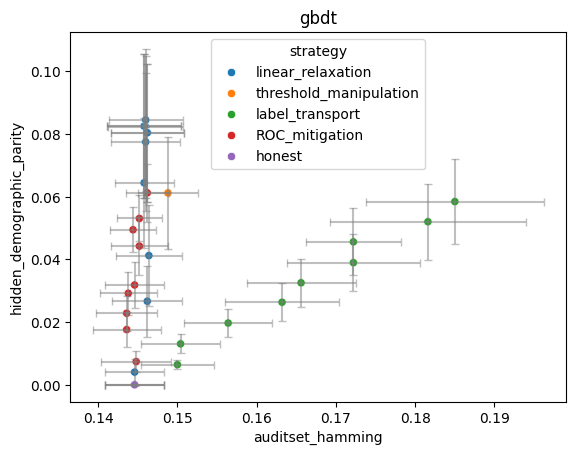

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/516959784.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


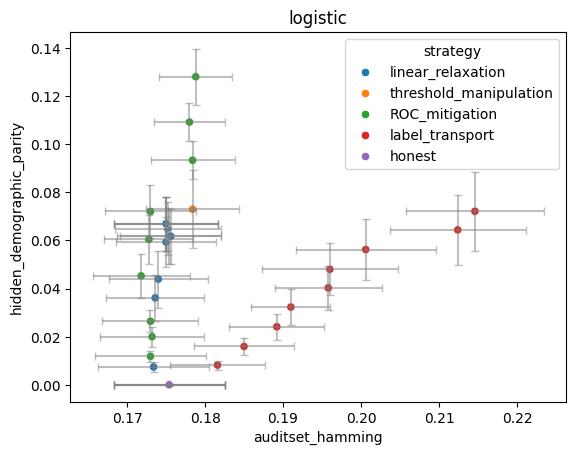

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/516959784.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


In [82]:
save_folder = "../generated/scatter_hamming_vs_hdp"

%mkdir -p $save_folder

# celeba_df = df[(df["dataset_name"] == "celeba") & (df["audit_budget"] == 1000)]

# attrs = celeba_df["attr"].unique()

# for attr in attrs:
#     attr_df = celeba_df[celeba_df["attr"] == attr]
    
#     cols_to_keep = [
#         "auditset_hamming", 
#         "auditset_hamming_std",
#         "hidden_demographic_parity",
#         "hidden_demographic_parity_std", 
#         "strategy", 
#         "base_model_name"
#     ]
#     df_to_save = attr_df[cols_to_keep]
#     df_to_save.dropna(inplace=True)
#     df_to_save.to_csv(f"{save_folder}/{attr}.dat", sep=" ", index=False)

ftdf = df[(df["dataset_name"] == "folktables") & (df["audit_budget"] == 1000)]
models = ftdf["base_model_name"].unique()
for model in models:
    model_df = ftdf[ftdf["base_model_name"] == model]
    
    for _, row in model_df.iterrows():
        plt.errorbar(
            row["auditset_hamming"], 
            row["hidden_demographic_parity"],
            xerr=row["auditset_hamming_std"],
            yerr=row["hidden_demographic_parity_std"],
            fmt='none',  # No marker, only error bars
            capsize=3,
            alpha=0.5,
            color="gray"
        )

    sns.scatterplot(data=model_df, x="auditset_hamming", y="hidden_demographic_parity", hue="strategy", markers=True)
    plt.title(model)

    plt.show()
    
    cols_to_keep = [
        "auditset_hamming", 
        "auditset_hamming_std",
        "hidden_demographic_parity",
        "hidden_demographic_parity_std", 
        "strategy", 
        "base_model_name"
    ]
    df_to_save = model_df[cols_to_keep]
    df_to_save.dropna(inplace=True)
    df_to_save.to_csv(f"{save_folder}/ft-{model}.dat", sep=" ", index=False)
    # sns.lineplot(data=model_df, x="group", y="accuracy", hue="binarize_group")
    # plt.title(f"Accuracy for {model}")
    # plt.show()

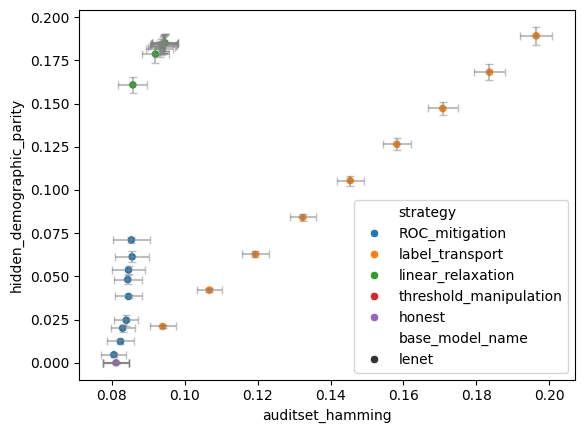

In [5]:


celeba_df = df[(df["dataset_name"] == "celeba") & (df["attr"] == "5_o_Clock_Shadow") & (df["audit_budget"] == 1000)]

for _, row in celeba_df.iterrows():
    plt.errorbar(
        row["auditset_hamming"], 
        row["hidden_demographic_parity"],
        xerr=row["auditset_hamming_std"],
        yerr=row["hidden_demographic_parity_std"],
        fmt='none',  # No marker, only error bars
        capsize=3,
        alpha=0.5,
        color="gray"
    )

sns.scatterplot(data=celeba_df, x="auditset_hamming", y="hidden_demographic_parity", hue="strategy", style="base_model_name", markers=True)


plt.show()

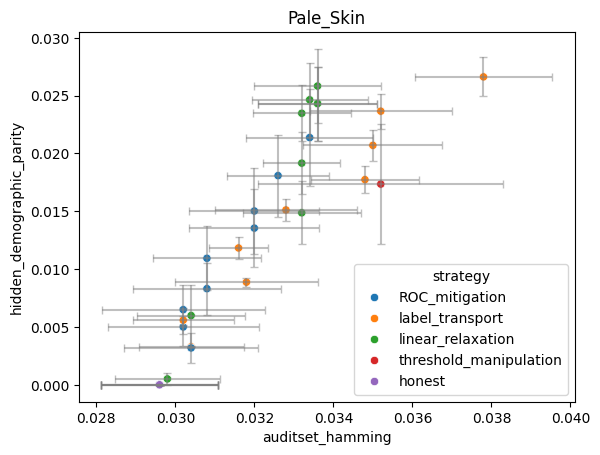

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


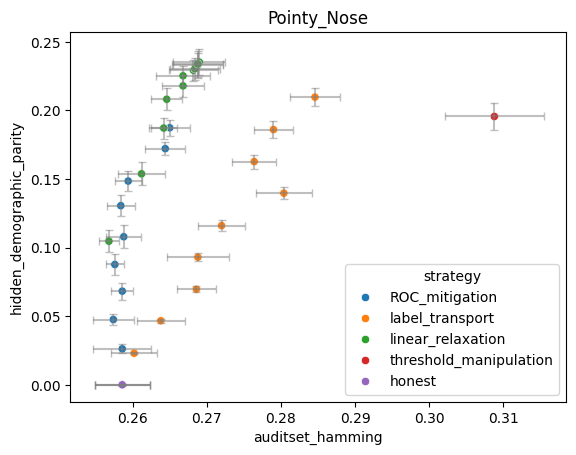

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


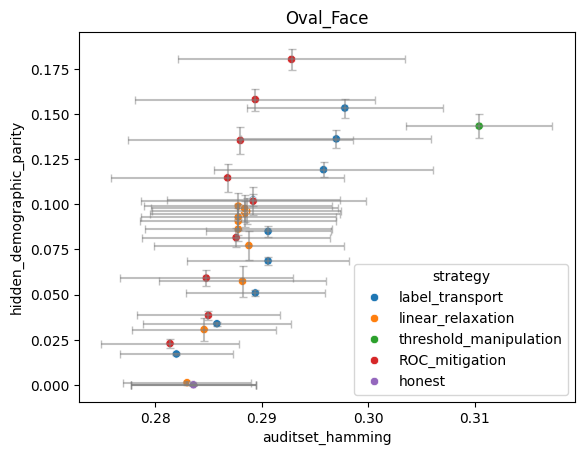

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


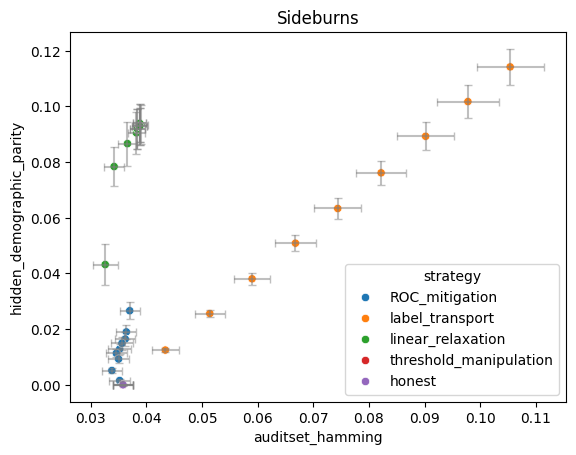

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


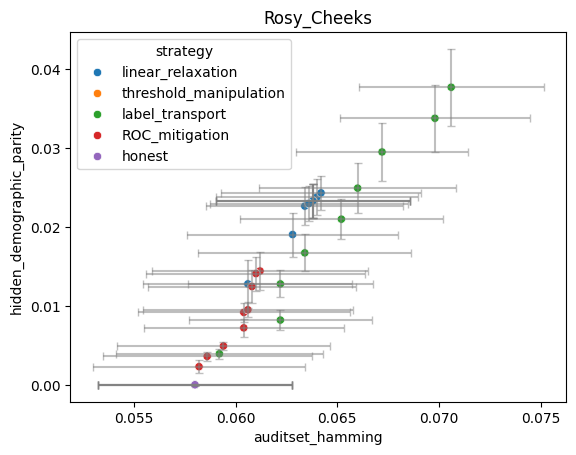

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


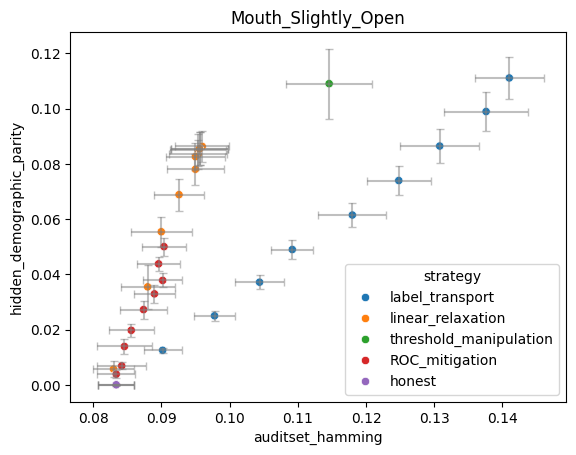

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


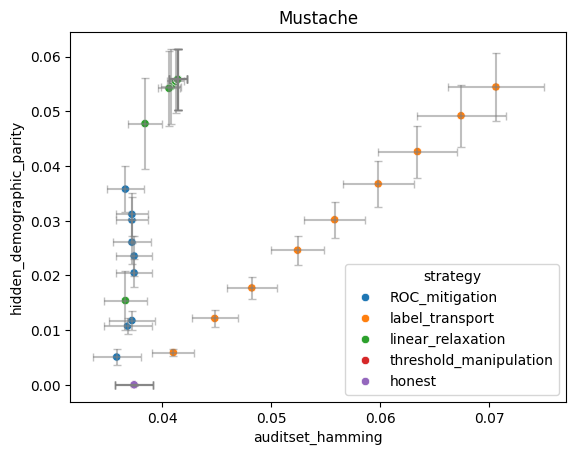

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


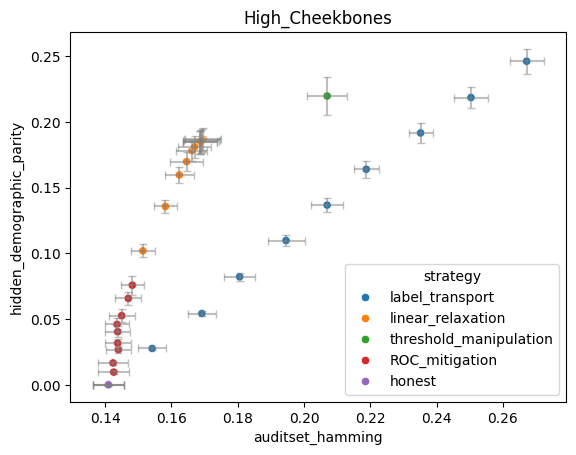

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


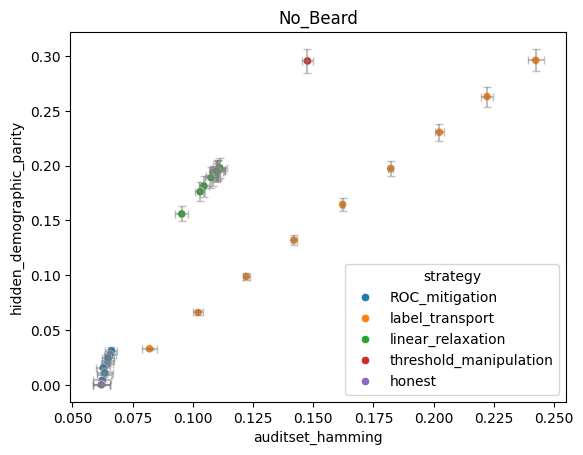

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


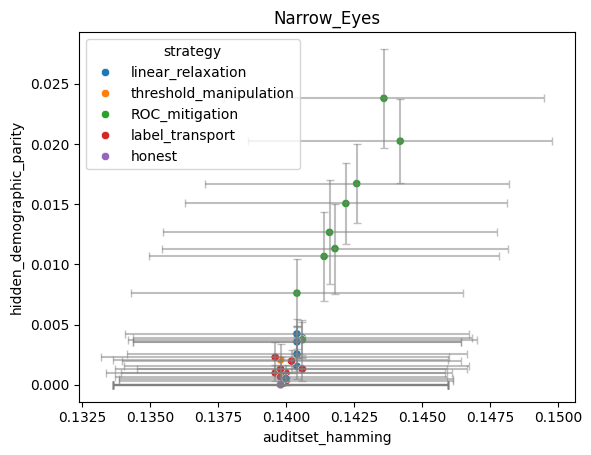

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


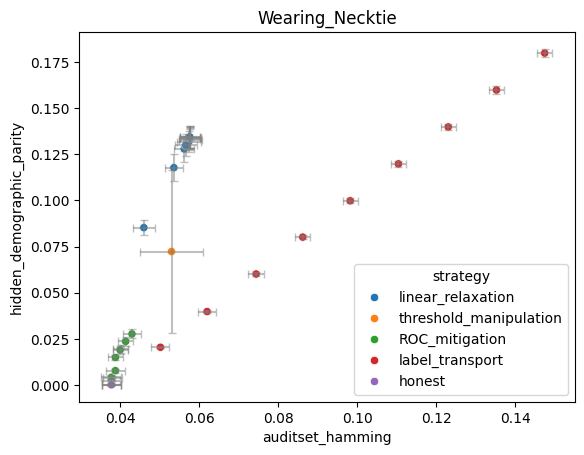

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


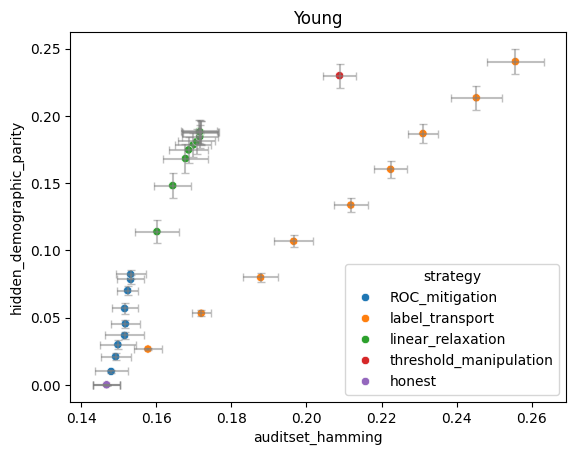

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


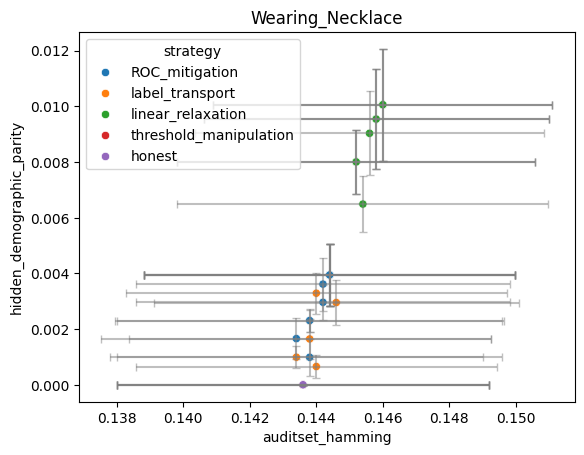

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


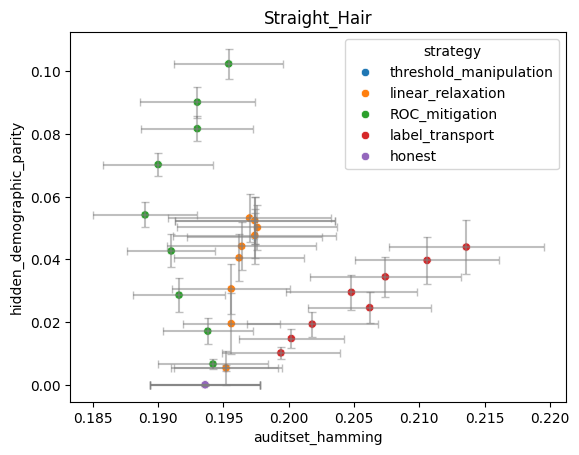

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


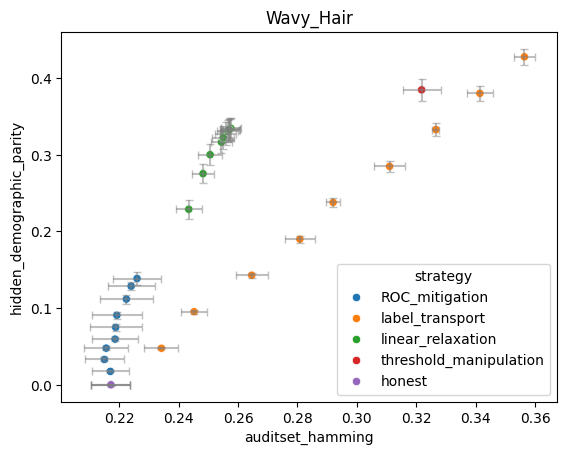

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


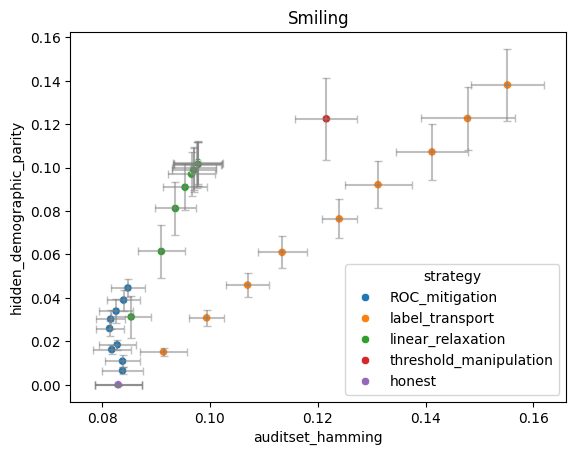

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


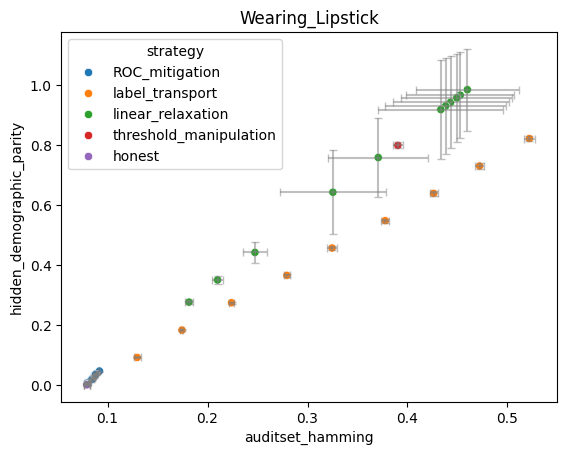

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


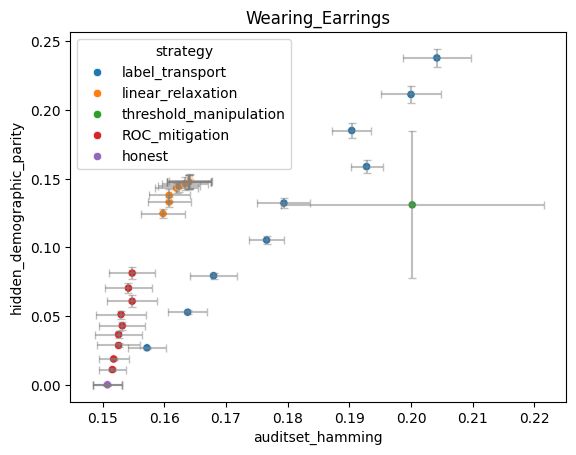

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


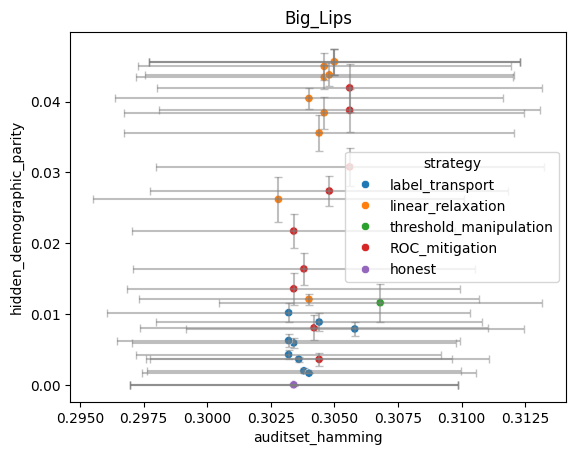

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


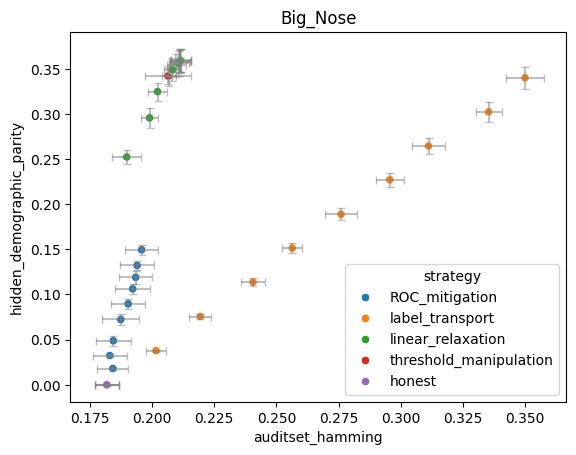

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


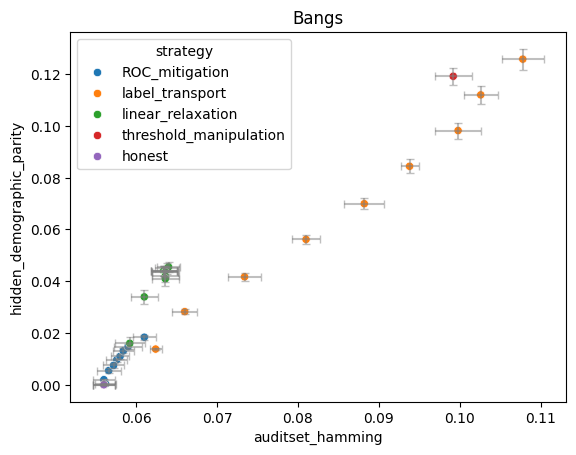

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


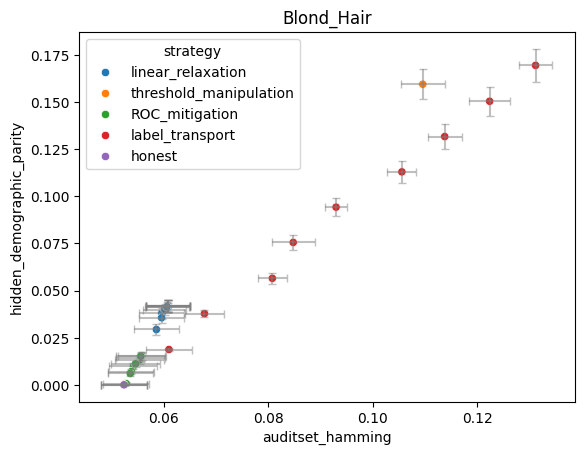

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


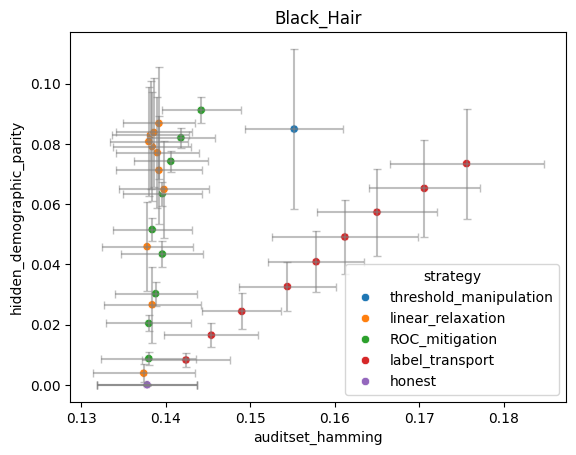

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


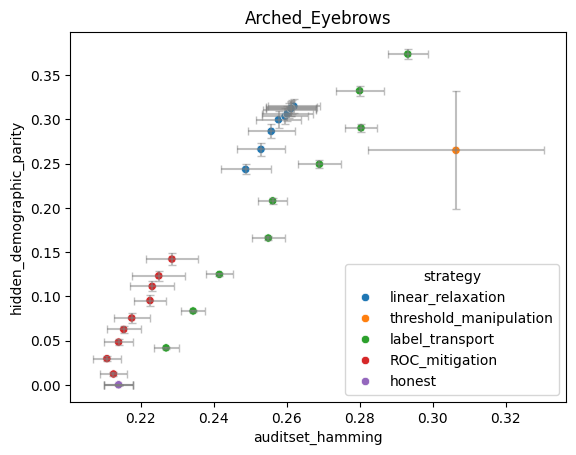

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


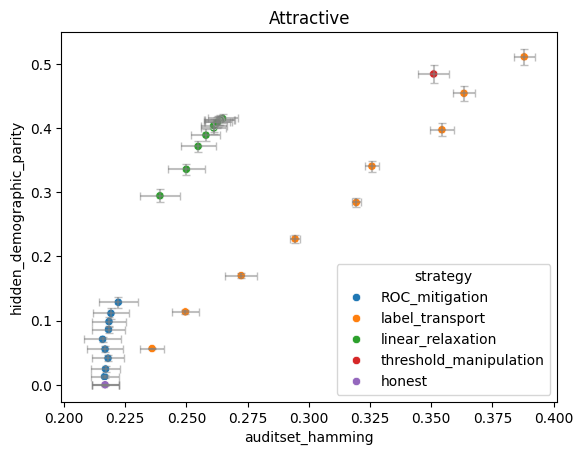

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


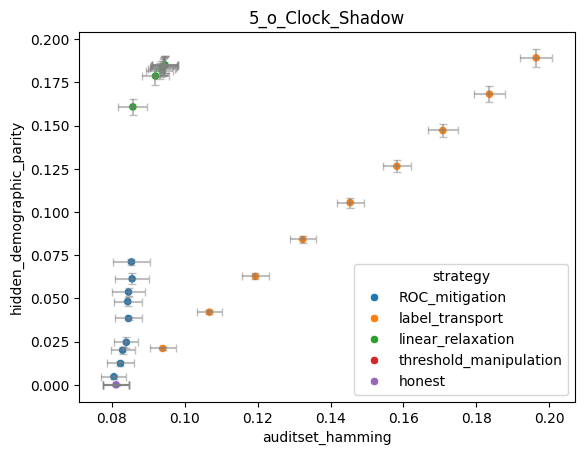

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


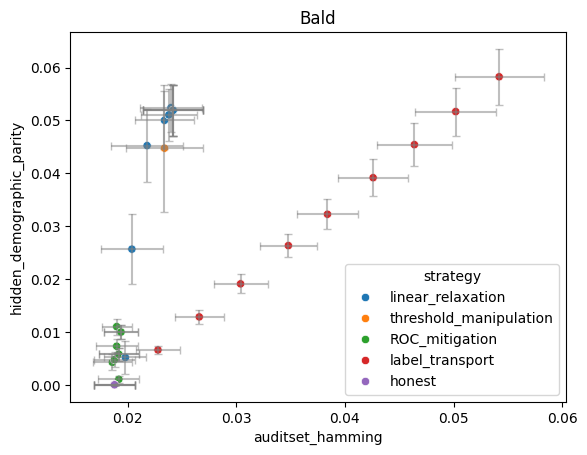

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


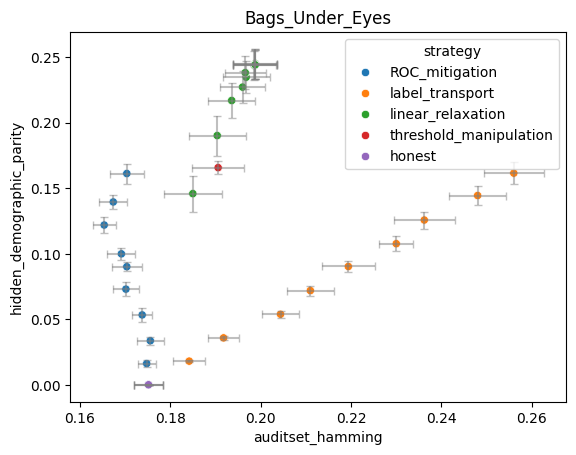

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


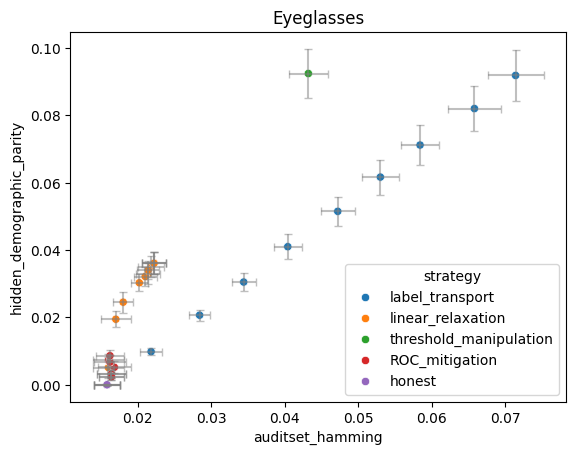

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


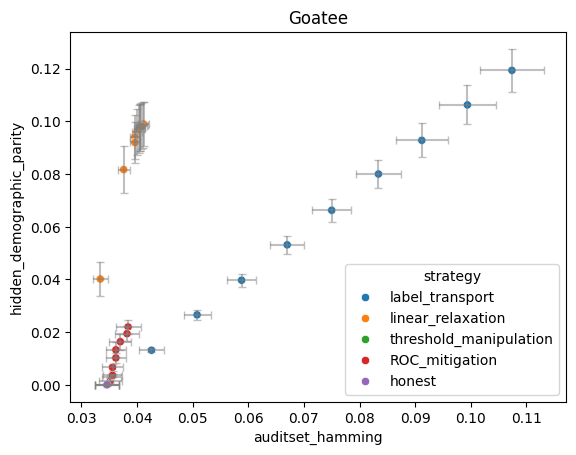

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


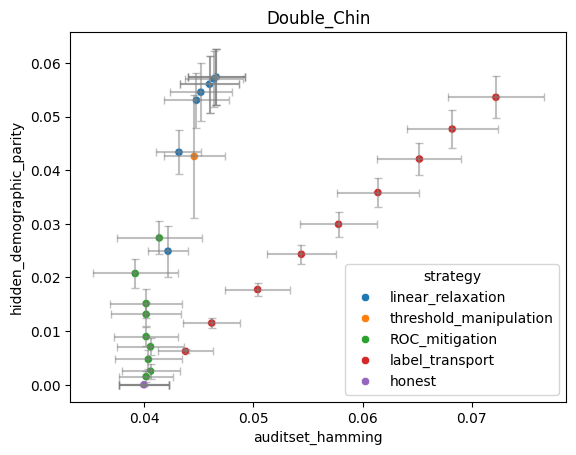

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


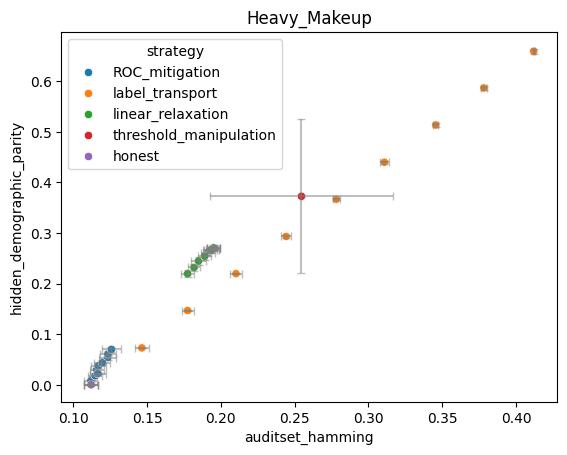

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


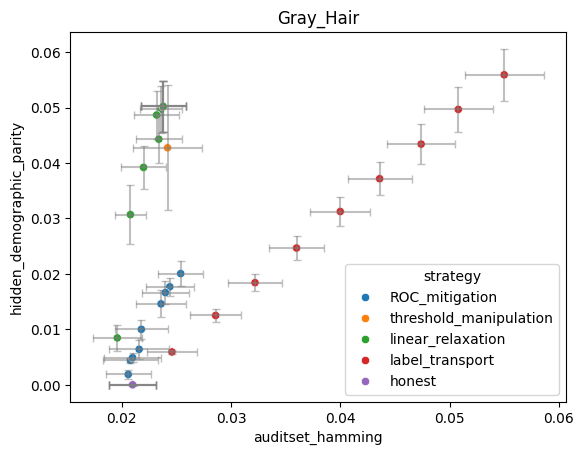

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


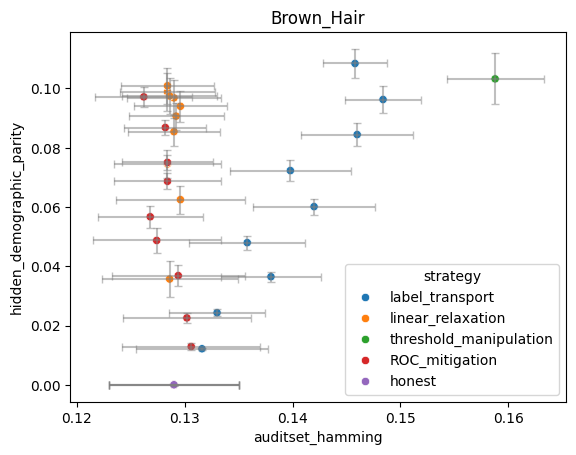

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


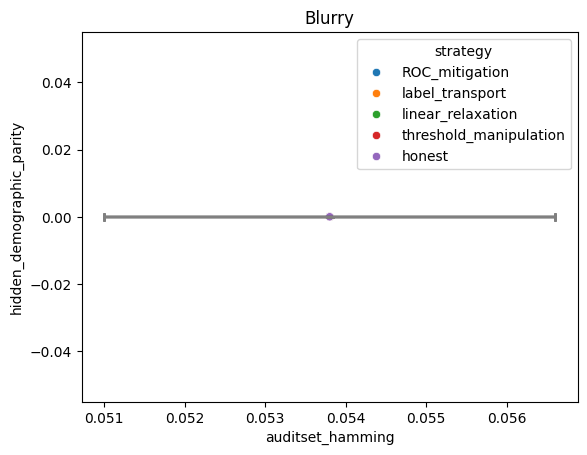

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


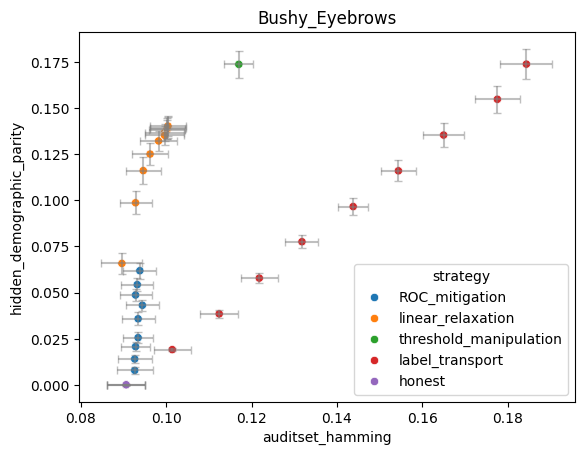

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


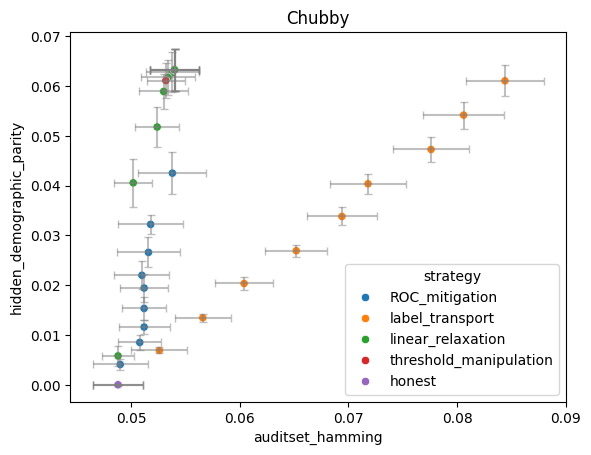

/var/folders/1r/sfgvd0ms44q415ntpmkzhcwh0000gp/T/ipykernel_90095/3986617555.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_save.dropna(inplace=True)


In [6]:
save_folder = "../generated/scatter_hamming_vs_hdp"

%mkdir -p $save_folder

celeba_df = df[(df["dataset_name"] == "celeba") & (df["audit_budget"] == 1000)]

attrs = celeba_df["attr"].unique()

for attr in attrs:
    attr_df = celeba_df[celeba_df["attr"] == attr]
    
    for _, row in attr_df.iterrows():
        plt.errorbar(
            row["auditset_hamming"], 
            row["hidden_demographic_parity"],
            xerr=row["auditset_hamming_std"],
            yerr=row["hidden_demographic_parity_std"],
            fmt='none',  # No marker, only error bars
            capsize=3,
            alpha=0.5,
            color="gray"
        )

    sns.scatterplot(data=attr_df, x="auditset_hamming", y="hidden_demographic_parity", hue="strategy", markers=True)
    plt.title(attr)

    plt.show()
    
    cols_to_keep = [
        "auditset_hamming", 
        "auditset_hamming_std",
        "hidden_demographic_parity",
        "hidden_demographic_parity_std", 
        "strategy", 
        "base_model_name"
    ]
    df_to_save = attr_df[cols_to_keep]
    df_to_save.dropna(inplace=True)
    df_to_save.to_csv(f"{save_folder}/{attr}.dat", sep=" ", index=False)

In [7]:
cols_to_keep = [
    "auditset_hamming", 
    "auditset_hamming_std",
    "hidden_demographic_parity",
    "hidden_demographic_parity_std", 
    "strategy", 
    "base_model_name"
]
celeba_df[cols_to_keep].to_csv("../results/pgfplotsdata.dat", sep=" ", index=False)

In [8]:
celeba_df[celeba_df["strategy"] == "honest"]

,dataset_name,attr,group,binarize_group,dataset,base_model_name,base_model_params,model_name,strategy,strategy_params,...,demographic_parity_audit_std,absolute_demographic_parity_audit_std,demographic_parity_audit_honest_std,performance_parity_audit_honest_std,absolute_demographic_parity_audit_honest_std,manipulation_hamming_std,auditset_hamming_std,hidden_demographic_parity_std,hidden_absolute_demographic_parity_std,is_honest
2617,celeba,Pointy_Nose,gender,True,"celeba(""Pointy_Nose"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,honest,"{""tolerated_unfairness"":null,""theta"":null}",...,0.006663,0.014898,0.014898,0.044332,0.014898,0.0,0.003709,0.0,0.0,True
2815,celeba,Sideburns,gender,True,"celeba(""Sideburns"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,honest,"{""tolerated_unfairness"":null,""theta"":null}",...,0.006405,0.014322,0.014322,0.032787,0.014322,0.0,0.001881,0.0,0.0,True
43,celeba,5_o_Clock_Shadow,gender,True,"celeba(""5_o_Clock_Shadow"",gender,binarize_grou...",lenet,"{""args"":[]}",unconstrained,honest,"{""tolerated_unfairness"":null,""theta"":null}",...,0.005209,0.011648,0.011648,0.038757,0.011648,0.0,0.003569,0.0,0.0,True
934,celeba,Blond_Hair,gender,True,"celeba(""Blond_Hair"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,honest,"{""tolerated_unfairness"":null,""theta"":null}",...,0.008719,0.019497,0.019497,0.076388,0.019497,0.0,0.004320,0.0,0.0,True
835,celeba,Black_Hair,gender,True,"celeba(""Black_Hair"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,honest,"{""tolerated_unfairness"":null,""theta"":null}",...,0.018302,0.040924,0.040924,0.046596,0.040924,0.0,0.005911,0.0,0.0,True
1528,celeba,Eyeglasses,gender,True,"celeba(""Eyeglasses"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,honest,"{""tolerated_unfairness"":null,""theta"":null}",...,0.007600,0.016993,0.016993,0.091553,0.016993,0.0,0.001715,0.0,0.0,True
1627,celeba,Goatee,gender,True,"celeba(""Goatee"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,honest,"{""tolerated_unfairness"":null,""theta"":null}",...,0.008134,0.018188,0.018188,0.094826,0.018188,0.0,0.002112,0.0,0.0,True
3013,celeba,Straight_Hair,gender,True,"celeba(""Straight_Hair"",gender,binarize_group=T...",lenet,"{""args"":[]}",unconstrained,honest,"{""tolerated_unfairness"":null,""theta"":null}",...,0.008539,0.019095,0.019095,0.058730,0.019095,0.0,0.004190,0.0,0.0,True
3112,celeba,Wavy_Hair,gender,True,"celeba(""Wavy_Hair"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,honest,"{""tolerated_unfairness"":null,""theta"":null}",...,0.010607,0.023717,0.023717,0.054190,0.023717,0.0,0.006591,0.0,0.0,True
1132,celeba,Brown_Hair,gender,True,"celeba(""Brown_Hair"",gender,binarize_group=True)",lenet,"{""args"":[]}",unconstrained,honest,"{""tolerated_unfairness"":null,""theta"":null}",...,0.005042,0.011275,0.011275,0.062059,0.011275,0.0,0.006025,0.0,0.0,True


In [9]:
celeba_df["audit_budget"].unique()

array([1000])

## Audit budget vs hidden DP

In [60]:
df = process_input_df(pd.read_csv("../generated/hiddable_unfairness-new.csv"))

df.head()

,dataset_name,attr,group,binarize_group,dataset,base_model_name,model_name,strategy,audit_budget,entropy,hidden_demographic_parity,entropy_std,hidden_demographic_parity_std,is_honest
0,celeba,5_o_Clock_Shadow,gender,True,"celeba(""5_o_Clock_Shadow"",gender,binarize_grou...",lenet,unconstrained,ROC_mitigation,100,2.571838e+09,0.045478,5.589113e+08,0.027861,False
229,celeba,Straight_Hair,gender,True,"celeba(""Straight_Hair"",gender,binarize_group=T...",lenet,unconstrained,ROC_mitigation,1000,2.571838e+09,0.102368,5.589113e+08,0.004804,False
228,celeba,Straight_Hair,gender,True,"celeba(""Straight_Hair"",gender,binarize_group=T...",lenet,unconstrained,ROC_mitigation,700,2.571838e+09,0.099893,5.589113e+08,0.011625,False
227,celeba,Straight_Hair,gender,True,"celeba(""Straight_Hair"",gender,binarize_group=T...",lenet,unconstrained,ROC_mitigation,500,2.571838e+09,0.096610,5.589113e+08,0.008822,False
226,celeba,Straight_Hair,gender,True,"celeba(""Straight_Hair"",gender,binarize_group=T...",lenet,unconstrained,ROC_mitigation,300,2.571838e+09,0.104973,5.589113e+08,0.016096,False


In [61]:
celeba_df = df[(df["dataset_name"] == "celeba")]# & (df["base_model_name"] == "lenet")]
celeba_df.head()

,dataset_name,attr,group,binarize_group,dataset,base_model_name,model_name,strategy,audit_budget,entropy,hidden_demographic_parity,entropy_std,hidden_demographic_parity_std,is_honest
0,celeba,5_o_Clock_Shadow,gender,True,"celeba(""5_o_Clock_Shadow"",gender,binarize_grou...",lenet,unconstrained,ROC_mitigation,100,2.571838e+09,0.045478,5.589113e+08,0.027861,False
229,celeba,Straight_Hair,gender,True,"celeba(""Straight_Hair"",gender,binarize_group=T...",lenet,unconstrained,ROC_mitigation,1000,2.571838e+09,0.102368,5.589113e+08,0.004804,False
228,celeba,Straight_Hair,gender,True,"celeba(""Straight_Hair"",gender,binarize_group=T...",lenet,unconstrained,ROC_mitigation,700,2.571838e+09,0.099893,5.589113e+08,0.011625,False
227,celeba,Straight_Hair,gender,True,"celeba(""Straight_Hair"",gender,binarize_group=T...",lenet,unconstrained,ROC_mitigation,500,2.571838e+09,0.096610,5.589113e+08,0.008822,False
226,celeba,Straight_Hair,gender,True,"celeba(""Straight_Hair"",gender,binarize_group=T...",lenet,unconstrained,ROC_mitigation,300,2.571838e+09,0.104973,5.589113e+08,0.016096,False


Skipping 5_o_Clock_Shadow linear_relaxation


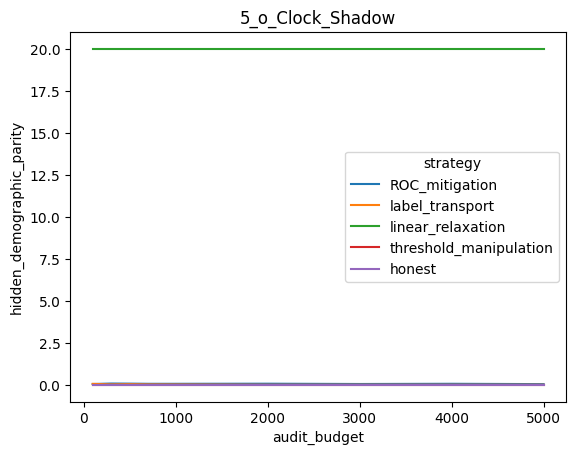

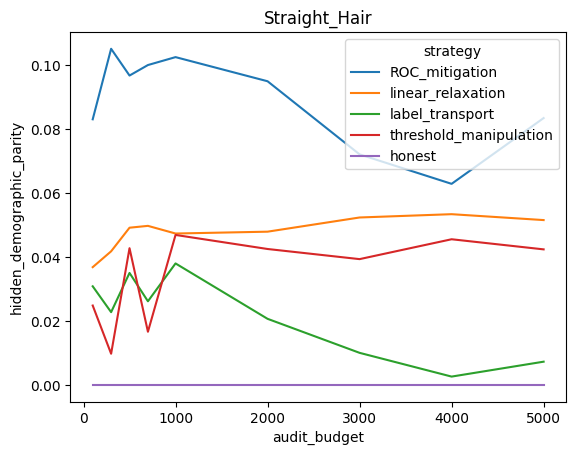

Skipping Smiling threshold_manipulation
Skipping Smiling linear_relaxation


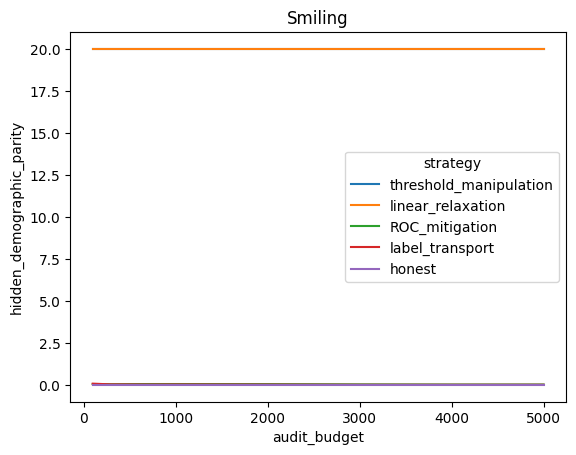

Skipping Mouth_Slightly_Open threshold_manipulation


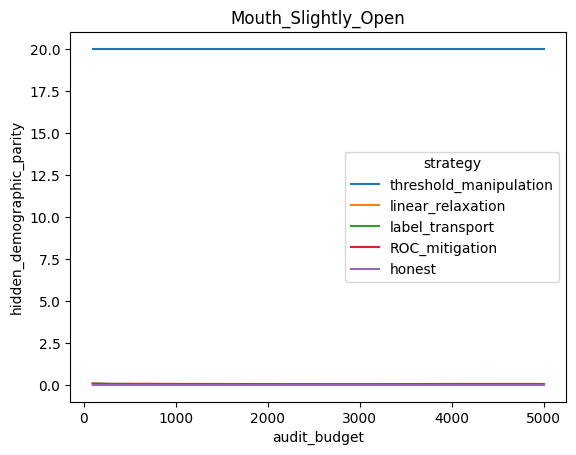

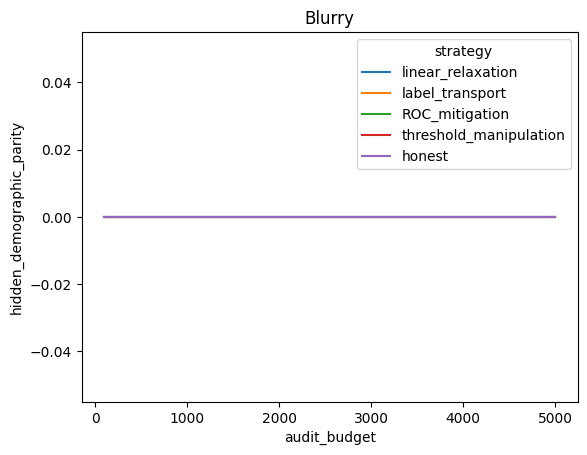

Skipping High_Cheekbones threshold_manipulation
Skipping High_Cheekbones linear_relaxation


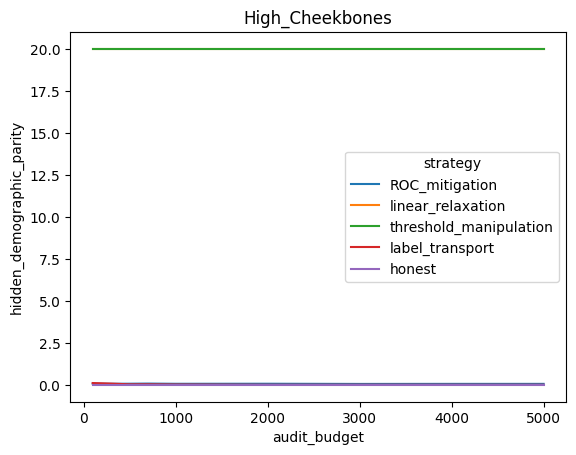

In [77]:
save_folder = "../generated/audit_budget_vs_hdp"

%mkdir -p $save_folder

for attr in celeba_df["attr"].unique():
    attr_df = celeba_df[celeba_df["attr"] == attr]
    
    for strategy in celeba_df["strategy"].unique():
        any_hidden_DP_nan = attr_df[attr_df["strategy"] == strategy]["hidden_demographic_parity"].isna().any()
        if any_hidden_DP_nan:
            print(f"Skipping {attr} {strategy}")
            attr_df.loc[attr_df["strategy"] == strategy, "hidden_demographic_parity"] = 20
    
    cols_to_keep = [
        "audit_budget", 
        "hidden_demographic_parity", 
        "hidden_demographic_parity_std", 
        "strategy"
    ]
    df_to_save = attr_df[cols_to_keep].copy()
    df_to_save.sort_values(by="audit_budget", inplace=True)
    df_to_save.fillna(0, inplace=True)
    df_to_save.to_csv(f"{save_folder}/{attr}.dat", index=False, sep=" ")
    
    
    sns.lineplot(data=attr_df, x="audit_budget", y="hidden_demographic_parity", hue="strategy")
    plt.title(attr)
    plt.show()

In [73]:
df_to_save

,audit_budget,hidden_demographic_parity,hidden_demographic_parity_std,strategy
99,100,0.000000,0.000000,honest
126,100,0.000000,0.000000,threshold_manipulation
117,100,0.104900,0.006200,linear_relaxation
90,100,0.068027,0.013111,ROC_mitigation
108,100,0.104011,0.036394,label_transport
127,300,0.000000,0.000000,threshold_manipulation
100,300,0.000000,0.000000,honest
118,300,0.151570,0.014374,linear_relaxation
109,300,0.070763,0.012653,label_transport
91,300,0.060075,0.008404,ROC_mitigation


In [74]:
attr_df = celeba_df[(celeba_df["attr"] == "Smiling") & (celeba_df["strategy"] == "threshold_manipulation")]
attr_df

,dataset_name,attr,group,binarize_group,dataset,base_model_name,model_name,strategy,audit_budget,entropy,hidden_demographic_parity,entropy_std,hidden_demographic_parity_std,is_honest
224,celeba,Smiling,gender,True,"celeba(""Smiling"",gender,binarize_group=True)",lenet,unconstrained,threshold_manipulation,5000,2.571838e+09,NaN,5.589113e+08,NaN,False
223,celeba,Smiling,gender,True,"celeba(""Smiling"",gender,binarize_group=True)",lenet,unconstrained,threshold_manipulation,4000,2.571838e+09,NaN,5.589113e+08,NaN,False
222,celeba,Smiling,gender,True,"celeba(""Smiling"",gender,binarize_group=True)",lenet,unconstrained,threshold_manipulation,3000,2.571838e+09,NaN,5.589113e+08,NaN,False
220,celeba,Smiling,gender,True,"celeba(""Smiling"",gender,binarize_group=True)",lenet,unconstrained,threshold_manipulation,1000,2.571838e+09,NaN,5.589113e+08,NaN,False
219,celeba,Smiling,gender,True,"celeba(""Smiling"",gender,binarize_group=True)",lenet,unconstrained,threshold_manipulation,700,2.571838e+09,NaN,5.589113e+08,NaN,False
218,celeba,Smiling,gender,True,"celeba(""Smiling"",gender,binarize_group=True)",lenet,unconstrained,threshold_manipulation,500,2.571838e+09,NaN,5.589113e+08,NaN,False
217,celeba,Smiling,gender,True,"celeba(""Smiling"",gender,binarize_group=True)",lenet,unconstrained,threshold_manipulation,300,2.571838e+09,0.065574,5.589113e+08,NaN,False
216,celeba,Smiling,gender,True,"celeba(""Smiling"",gender,binarize_group=True)",lenet,unconstrained,threshold_manipulation,100,2.571838e+09,0.084353,5.589113e+08,0.025993,False
221,celeba,Smiling,gender,True,"celeba(""Smiling"",gender,binarize_group=True)",lenet,unconstrained,threshold_manipulation,2000,2.571838e+09,NaN,5.589113e+08,NaN,False


In [75]:
ft_df = df[(df["dataset_name"] == "folktables")]
ft_df.head()

,dataset_name,attr,group,binarize_group,dataset,base_model_name,model_name,strategy,audit_budget,entropy,hidden_demographic_parity,entropy_std,hidden_demographic_parity_std,is_honest
358,folktables,ACSEmployment,race,True,"folktables(ACSEmployment,race,binarize_group=T...",gbdt,unconstrained,threshold_manipulation,5000,2.571838e+09,0.063607,5.589113e+08,0.004810,False
337,folktables,ACSEmployment,race,True,"folktables(ACSEmployment,race,binarize_group=T...",logistic,unconstrained,linear_relaxation,3000,2.571838e+09,0.066517,5.589113e+08,0.009624,False
336,folktables,ACSEmployment,race,True,"folktables(ACSEmployment,race,binarize_group=T...",gbdt,unconstrained,linear_relaxation,3000,2.571838e+09,0.076602,5.589113e+08,0.013364,False
335,folktables,ACSEmployment,race,True,"folktables(ACSEmployment,race,binarize_group=T...",gbdt,unconstrained,linear_relaxation,2000,2.571838e+09,0.073851,5.589113e+08,0.016672,False
334,folktables,ACSEmployment,race,True,"folktables(ACSEmployment,race,binarize_group=T...",logistic,unconstrained,linear_relaxation,2000,2.571838e+09,0.063685,5.589113e+08,0.010191,False


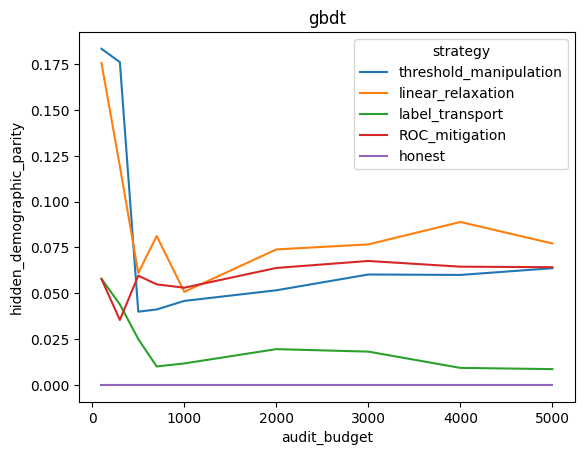

Skipping logistic threshold_manipulation


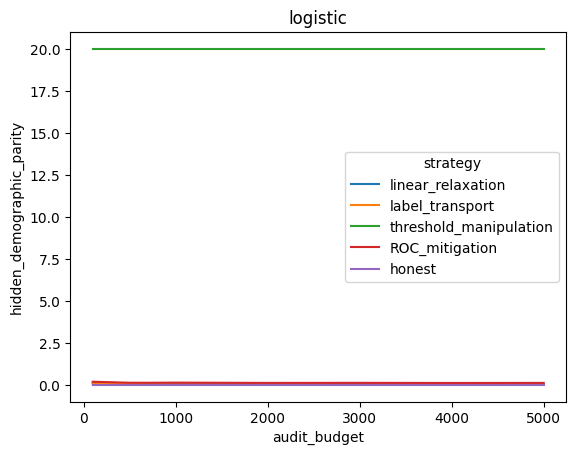

In [76]:
save_folder = "../generated/audit_budget_vs_hdp"

%mkdir -p $save_folder

for base_model in ft_df["base_model_name"].unique():
    model_df = ft_df[ft_df["base_model_name"] == base_model]
    for strategy in celeba_df["strategy"].unique():
        any_hidden_DP_nan = model_df[model_df["strategy"] == strategy]["hidden_demographic_parity"].isna().any()
        if any_hidden_DP_nan:
            print(f"Skipping {base_model} {strategy}")
            
            model_df.loc[model_df["strategy"] == strategy, "hidden_demographic_parity"] = 20
    
    cols_to_keep = [
        "audit_budget", 
        "hidden_demographic_parity", 
        "hidden_demographic_parity_std", 
        "strategy"
    ]
    df_to_save = model_df[cols_to_keep].copy()
    df_to_save.fillna(0, inplace=True)
    df_to_save.sort_values(by="audit_budget", inplace=True)
    df_to_save.to_csv(f"{save_folder}/ft-{base_model}.dat", index=False, sep=" ")
    
    sns.lineplot(data=model_df, x="audit_budget", y="hidden_demographic_parity", hue="strategy")
    plt.title(base_model)
    plt.show()